In [1]:
from numpy import array, arange,sqrt,linspace,zeros
from pylab import plot, show,xlim,ylim,legend

# Exercise 8.14

In [118]:
m=9.1094e-31
hbar=1.0546e-34
e=1.6022e-19
a=1e-11
Vo=50*e
w=10*a ##boundary for PDE
N=1000
h=2*w/N

In [135]:
def V(x):
    return(Vo*(x/a)**2)

In [134]:
def V(x):
    return(Vo*(x/a)**4)

In [136]:
def f(r,x,E):
    psi=r[0]
    phi=r[1]
    dpsi=phi
    dphi=(2*m/hbar**2)*(V(x)-E)*psi
    return(array([dpsi,dphi],float))

In [137]:
def solve(E): #for when we get the whole function
    psi=0.0
    phi=1.0
    r=array([psi,phi],float)
    psipoints=[psi]
    
    for x in arange(-w,w,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
        psipoints.append(r[0])
    return(array(psipoints,float))

In [138]:
def boundary(E): #for the shooting method
    psi=solve(E)
    return(psi[N])#return the last point

In [139]:
def secant(E1,E2): 
    psi2=boundary(E1)
    target=e/10000
    while abs(E1-E2)>target:
        psi1,psi2 = psi2,boundary(E2)
        E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    return(E2)

In [140]:
def waveplot(E):
    psi=solve(E)
    halfpsi=psi[0:N//2+1]
    
    integral=2*h*(sum(halfpsi**2)-0.5*halfpsi[0]**2-0.5*halfpsi[N//2]**2)
    psi/=integral
    x=linspace(-w,w,N+1)
    print(h*sum(psi*psi))
    plot(x,psi)
    

138.02397205978716
3.2063928536523264e+18
690.1198621105536
7.252818071575163e+21
966.1678095064755
1.5484989344198557e+23


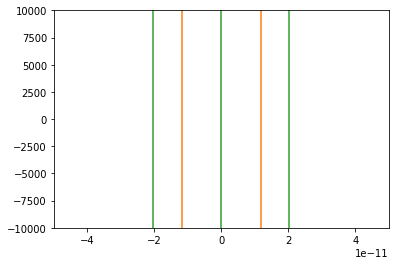

In [141]:
E=secant(0*e,10*e)
print(E/e)
waveplot(E)
E=secant(500*e,510*e)
print(E/e)
waveplot(E)
E=secant(1000*e,1010*e)
print(E/e)
waveplot(E)
xlim(-5*a,5*a)
ylim(-1e4,1e4)
show()

In [117]:
show()

In [2]:
def rk4v4(r,tpoints,*argv):
    N=len(tpoints)
    ypoints=zeros(N,float)
    xpoints=zeros(N,float)
    xpoints[0]=r[0]
    ypoints[0]=r[1]
    
   
    h=tpoints[1]-tpoints[0]
    
   
    for i,t in enumerate(tpoints[:-1]):
        
        k1=h*f2(r,t,*argv)
        k2=h*f2(r+.5*k1,t+.5*h,*argv)
        k3=h*f2(r+.5*k2,t+.5*h,*argv)
        k4=h*f2(r+k3, t+h,*argv)
        r+=(k1+2*k2+2*k3+k4)/6
        
        xpoints[i+1]=r[0]
        ypoints[i+1]=r[1]
    return array([xpoints,ypoints])

In [3]:
def f2(r,t):
    x=r[0]
    y=r[1]
    u=r[2]
    v=r[3]
    
    rcube=(x*x+y*y)**1.5
    dx=u
    dy=v
    du=-G*M*x/rcube
    dv=-G*M*y/rcube
   
    return(array([dx,dy,du,dv]))

In [4]:
G=6.674e-11
M=1.989e30
h=1e4
tmax=2e9
x=4e12
y=0
u=0
v=500
r=array([x,y,u,v])
tpoints=arange(0,tmax,h)
x,y=rk4v4(r,tpoints)

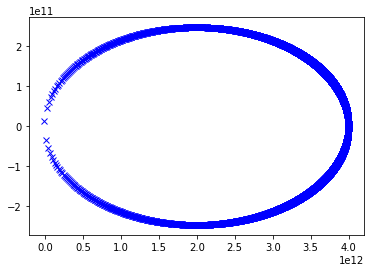

In [5]:
plot(x[::50],y[::50],"bx")
show()

In [42]:

def rk4step(h,r,t):
    k1=h*f2(r,t)
    k2=h*f2(r+.5*k1,t+.5*h)
    k3=h*f2(r+.5*k2,t+.5*h)
    k4=h*f2(r+k3, t+h)
    r=(k1+2*k2+2*k3+k4)/6
    return(r)

In [6]:
h=1e4
tmax=2e9
x=4e12
y=0
u=0
v=500
r=array([x,y,u,v])
tpoints=[]
tpoints.append(0)
xpoints=[]
ypoints=[]
xpoints.append(x)
ypoints.append(y)
delta=1000/(365*3600)
t=0
while (t<tmax): 
    
    
    r1=r+rk4step(h,r,t)
    r1+=rk4step(h,r1,t+h)
    r2=r+rk4step(2*h,r,t)
    errx=r1[0]-r2[0]
    erry=r1[1]-r2[1]
    rho=30.*h*delta/sqrt(errx**2+erry**2)
    if rho>1:
        tpoints.append(t+2*h)
        xpoints.append(r1[0])
        ypoints.append(r1[1])
        
        h=h*rho**.25
        t=t+2*h
       
        r=r1
        print(r)
    else:
        h=h*rho**.25
       
    

NameError: name 'rk4step' is not defined

In [ ]:
plot(xpoints,ypoints,"rx")
show()

In [ ]:
Mearth=5.9722e24
x0=1.5120e11
y0=0.0
vx0=0.0
vy0=2.9291e4
t0=0
tf=50e6
h=3600

In [ ]:
def rmag(r):
    return(sqrt(sum(r*r)))

In [ ]:
def f(r,t):
    return -G*M*r/rmag(r)**3

In [ ]:
def V(r):
    return -G*M*Mearth/rmag(r)

In [ ]:
def T(v):
    return 0.5*Mearth*sum(v*v)

In [43]:
r=array([x0,y0])
v=array([vx0,vy0])
vhalf=v+0.5*h*f(r,t)
tpoints=arange(t0,tf,h)
xpoints=[]
ypoints=[]
Vpoints=[]
Tpoints=[]
Epoints=[]
for t in arange(t0,tf,h):
    xpoints.append(r[0])
    ypoints.append(r[1])
    Vpoints.append(V(r))
    Tpoints.append(T(v))
    Epoints.append(V(r)+T(v))
    r+=h*vhalf
    k=h*f(r,t)
    v=vhalf+.5*k
    vhalf+=k
    

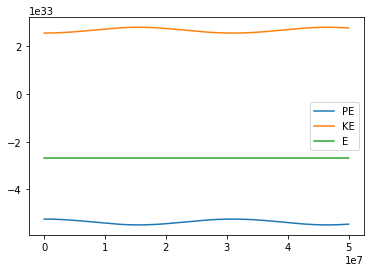

In [51]:
plot(tpoints,Vpoints,label="PE")
plot(tpoints,Tpoints,label="KE")
plot(tpoints,Epoints,label="E")
legend()
show()

In [ ]:
p